In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
hospital_data = pd.read_csv("hospital_appointment.csv")

In [3]:
hospital_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
hospital_data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
hospital_data.shape

(110527, 14)

In [6]:
hospital_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
hospital_data.rename(columns={'No-show': 'No_show'}, inplace=True)
hospital_data.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
hospital_data.rename(columns={'Handcap': 'Handicap'}, inplace=True)

In [8]:
hospital_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
hospital_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
hospital_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

In [11]:
hospital_data.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No_show                2
dtype: int64

In [12]:
hospital_data1 = hospital_data[['Gender','Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap',
                                'SMS_received', 'No_show']]

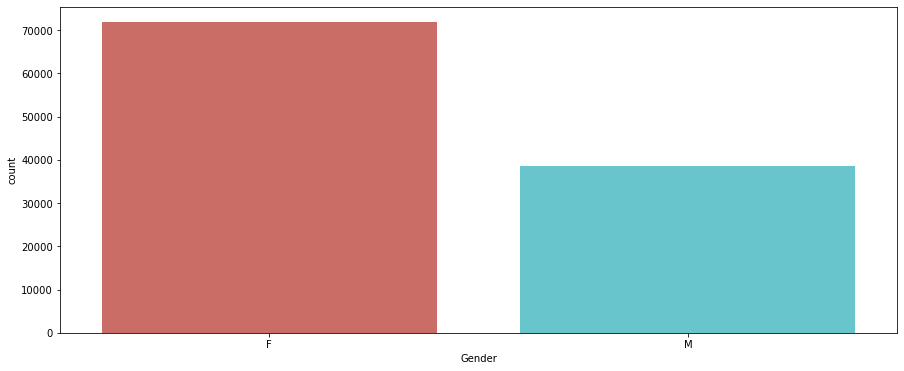

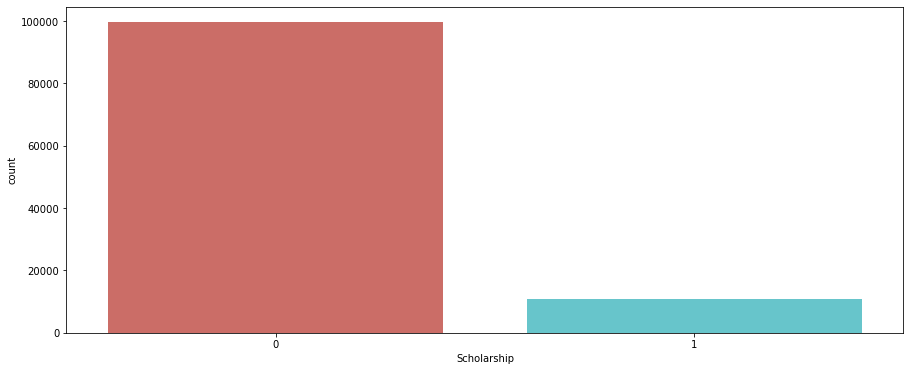

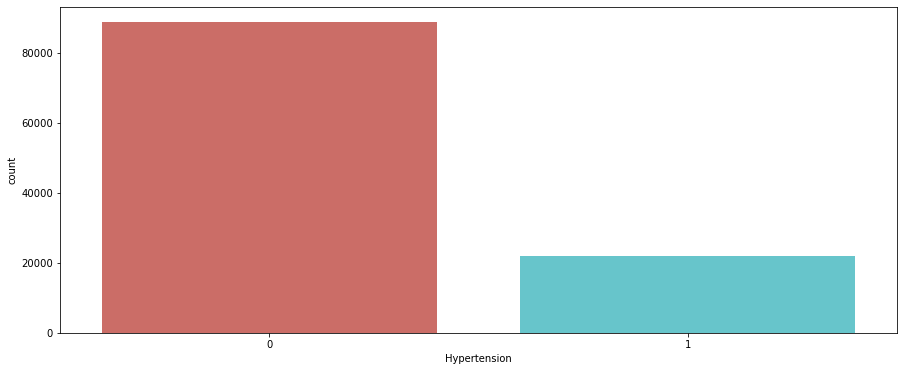

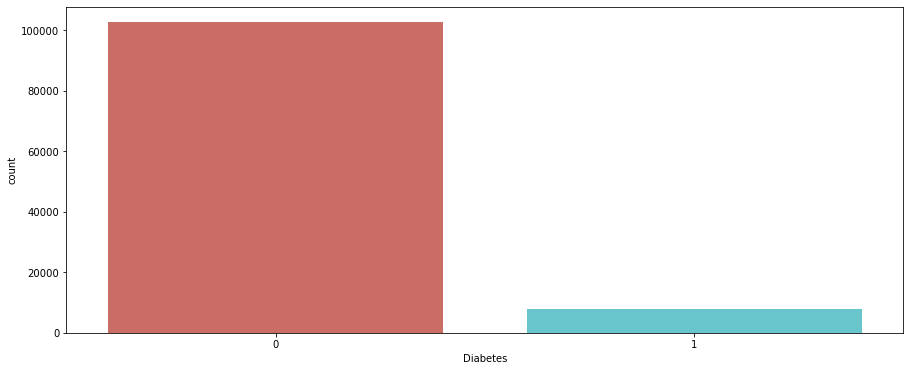

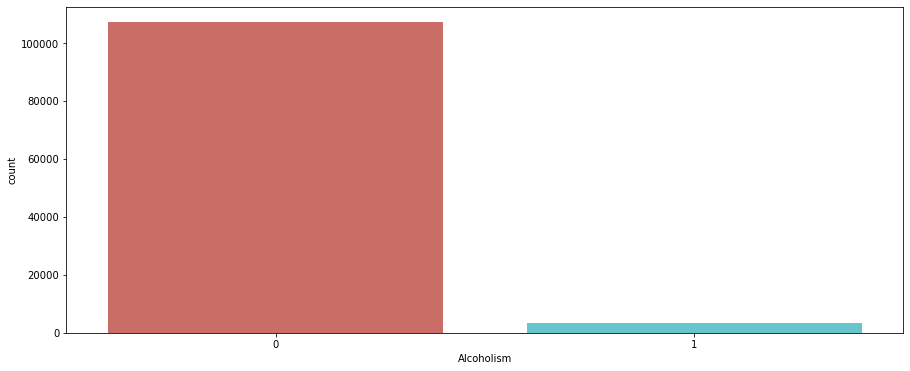

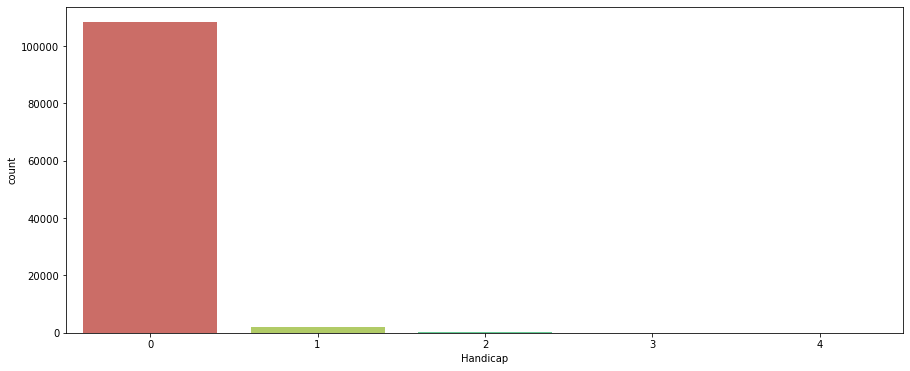

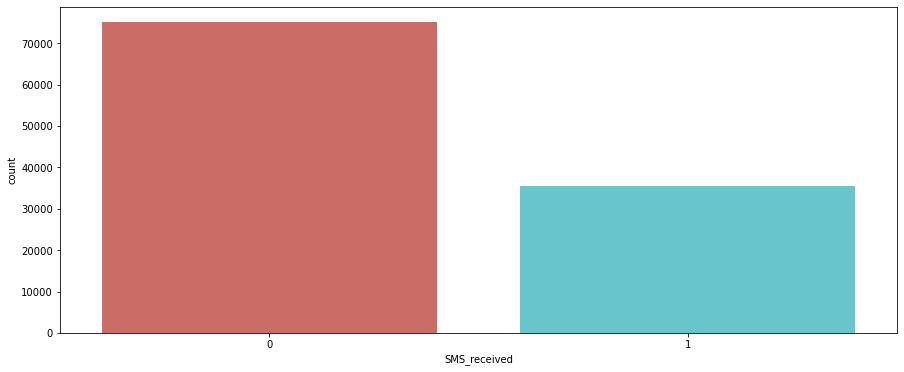

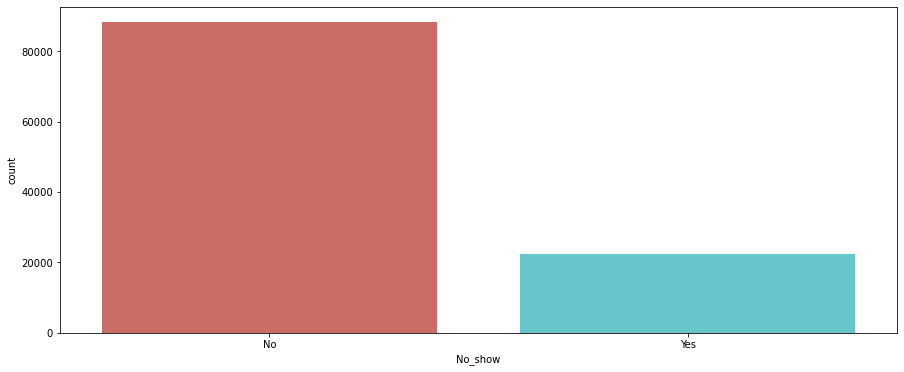

In [13]:
for i in hospital_data1.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(hospital_data1[i], data = hospital_data1,    palette='hls')
    plt.show()

In [14]:
hospital_data2 = hospital_data.copy()

In [15]:
hospital_data2.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [16]:
hospital_data2['Age'].replace(0, hospital_data2['Age'].mean() , inplace = True)

In [17]:
hospital_data2['Age'] = hospital_data2['Age'].abs()

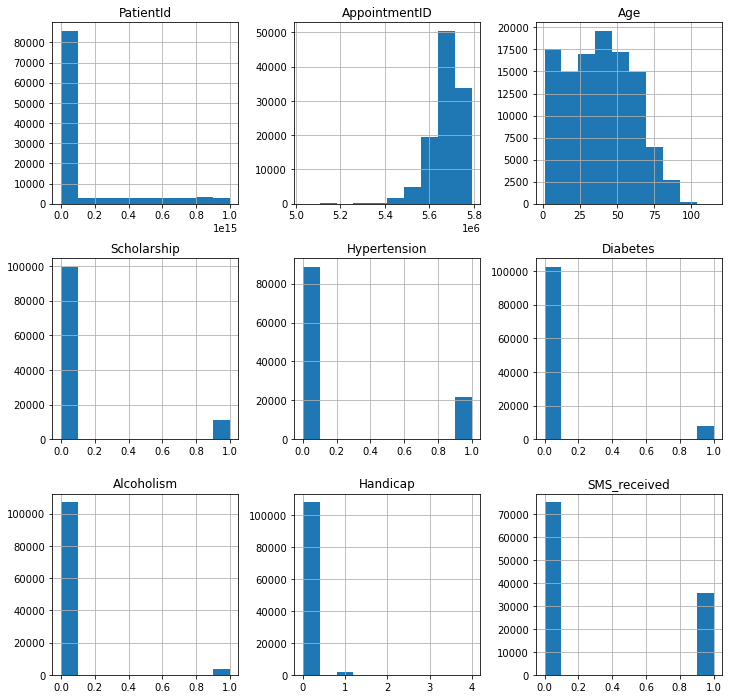

In [18]:
hospital_data2.hist(figsize=(12,12));

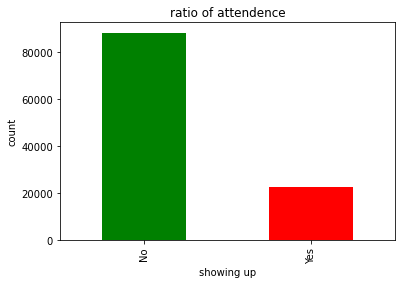

In [19]:
hospital_data2.No_show.value_counts().plot.bar(color=['green','red']);
plt.title("ratio of attendence")
plt.xlabel("showing up")
plt.ylabel("count")
plt.show()

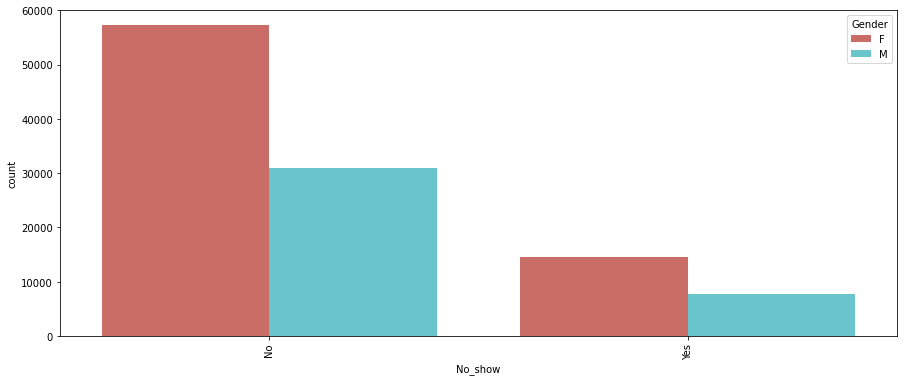

In [20]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'Gender' , data = hospital_data2, palette='hls')
plt.xticks(rotation = 90)
plt.show()

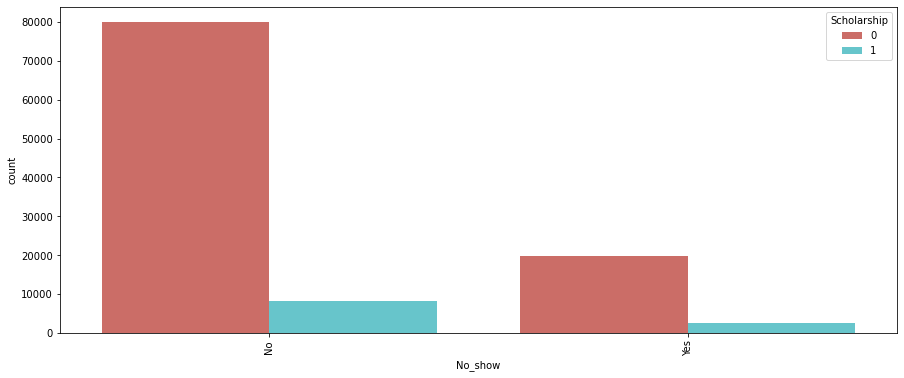

In [21]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'Scholarship' , data = hospital_data2,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

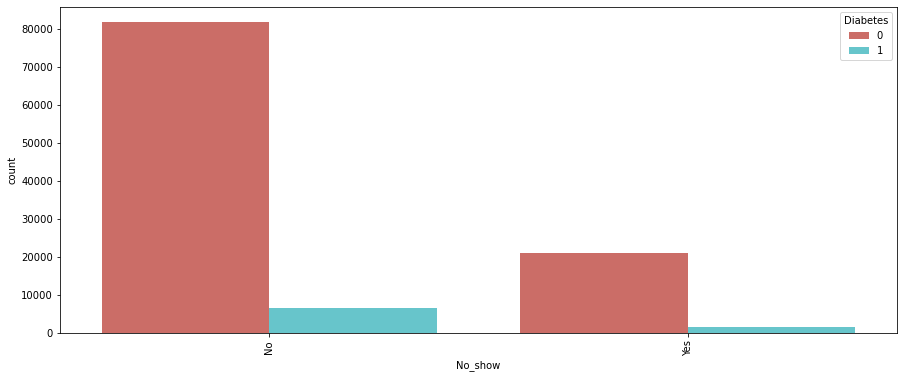

In [22]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'Diabetes' , data = hospital_data2,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

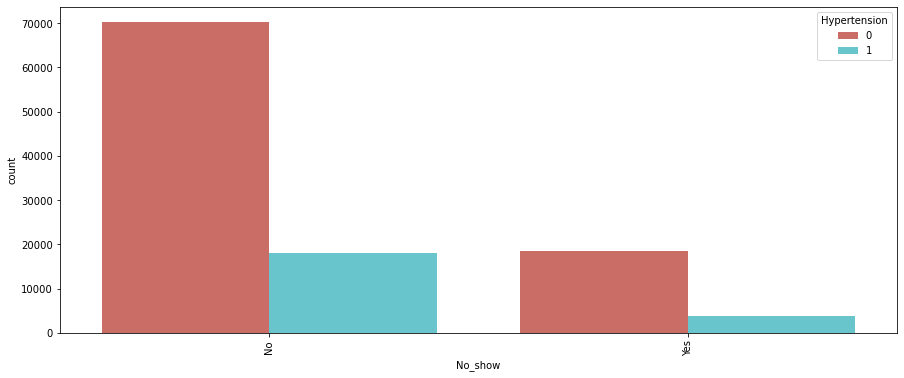

In [23]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'Hypertension' , data = hospital_data2,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

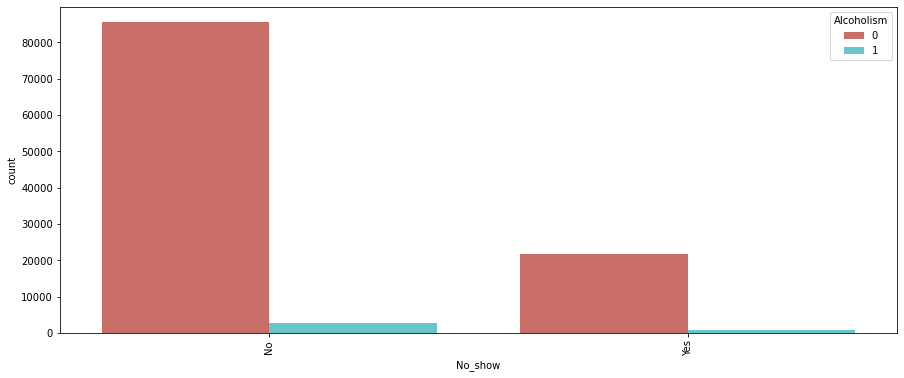

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'Alcoholism' , data = hospital_data2,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

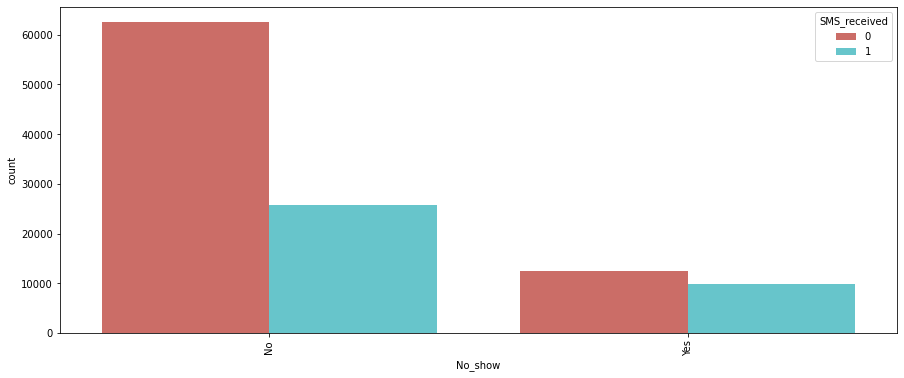

In [25]:
plt.figure(figsize=(15,6))
sns.countplot('No_show', hue = 'SMS_received' , data = hospital_data2,
palette='hls')
plt.xticks(rotation = 90)
plt.show()

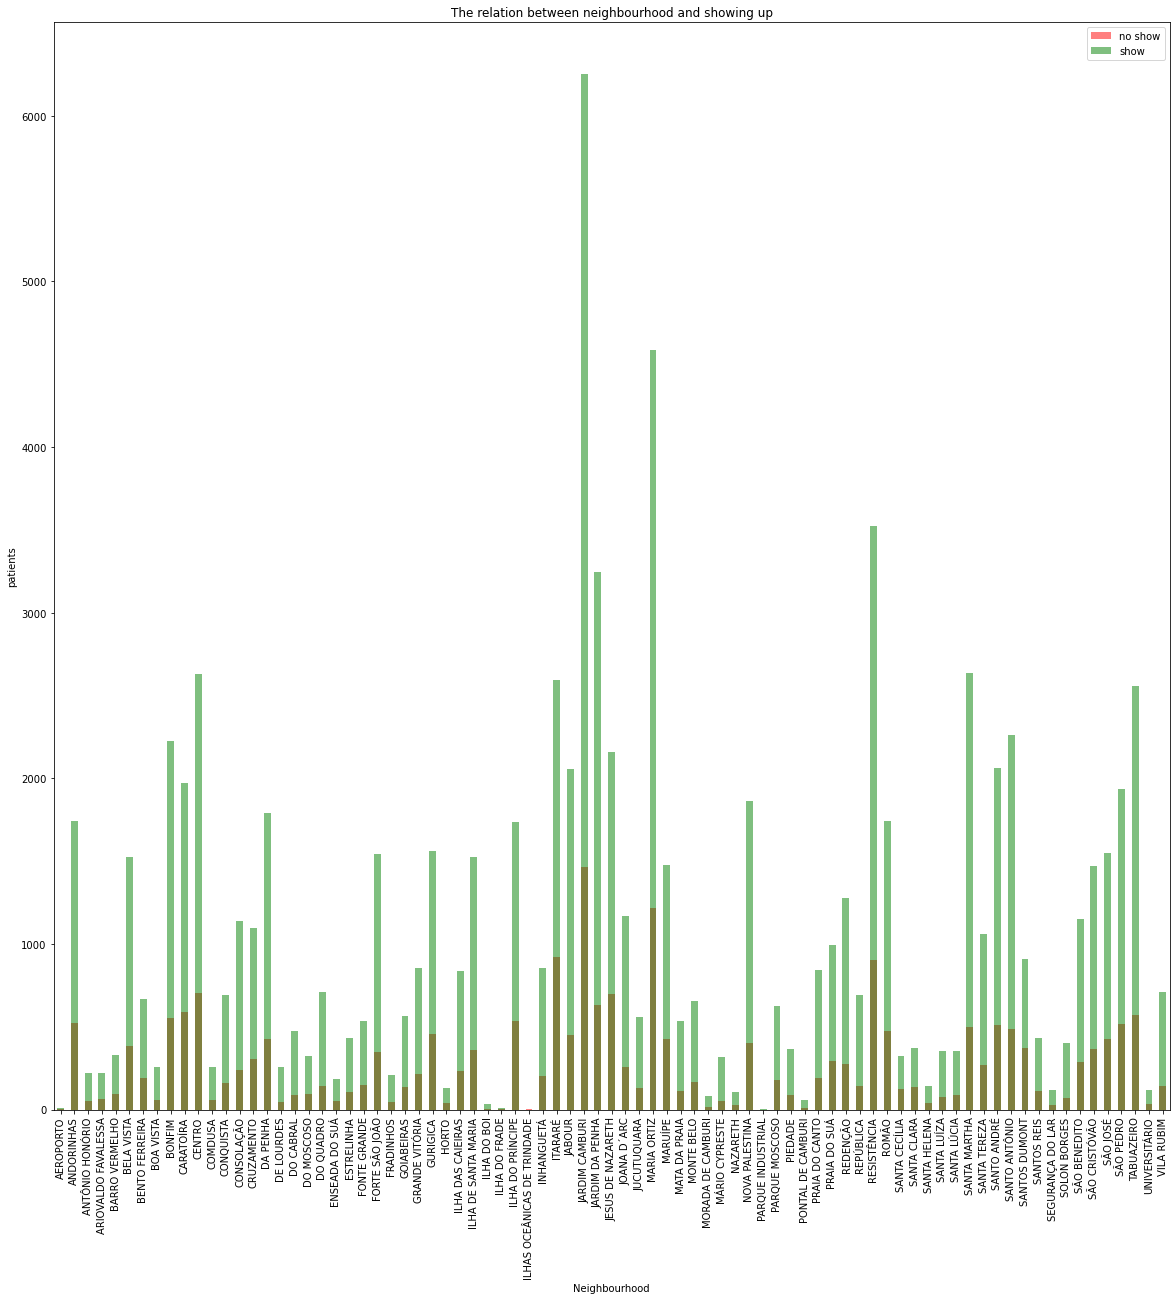

In [26]:
plt.figure(figsize=[20,20])
e = hospital_data2.groupby(['Neighbourhood','No_show']).size().unstack()
e.Yes.plot(kind='bar' , alpha=.5 , color = 'red' , label= 'no show')
e.No.plot(kind='bar' , alpha=.5 , color = 'green' , label= 'show')
plt.legend()
plt.title("The relation between neighbourhood and showing up")
plt.xlabel("Neighbourhood")
plt.ylabel("patients")
plt.show()

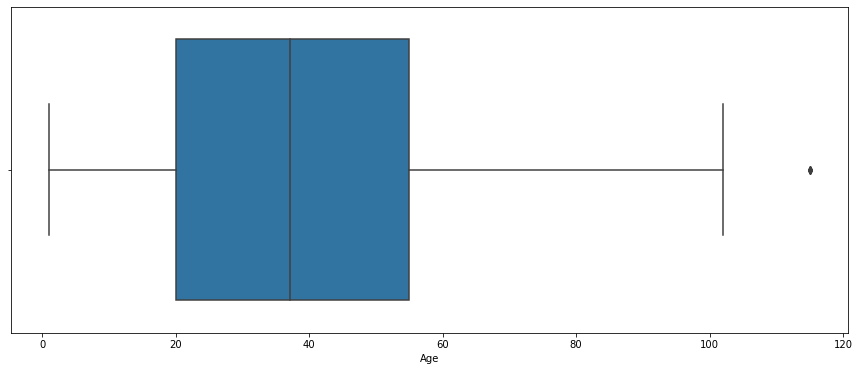

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(hospital_data2['Age'])
plt.show()

In [28]:
hospital_age= hospital_data2['Age']
Q3 = hospital_age.quantile(0.75)
Q1 = hospital_age.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
age_outliers = hospital_age[(hospital_age <lower_limit) | (hospital_age >upper_limit)]
age_outliers

63912    115.0
63915    115.0
68127    115.0
76284    115.0
97666    115.0
Name: Age, dtype: float64

In [29]:
lower_limit

-32.5

In [30]:
upper_limit

107.5

In [31]:
hospital_data_new = hospital_data.drop([63912, 63915, 68127, 76284, 97666])


In [32]:
hospital_data_new.corr()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
PatientId,1.000000,0.004027,-0.004157,-0.002879,-0.006492,0.001607,0.011013,-0.007820,-0.009792
AppointmentID,0.004027,1.000000,-0.019152,0.022617,0.012742,0.022631,0.032946,0.014111,-0.256635
Age,-0.004157,-0.019152,1.000000,-0.092431,0.504727,0.292510,0.095863,0.077370,0.012686
Scholarship,-0.002879,0.022617,-0.092431,1.000000,-0.019729,-0.024898,0.035020,-0.008520,0.001190
Hypertension,-0.006492,0.012742,0.504727,-0.019729,1.000000,0.433096,0.087973,0.080249,-0.006306
Diabetes,0.001607,0.022631,0.292510,-0.024898,0.433096,1.000000,0.018471,0.057629,-0.014554
Alcoholism,0.011013,0.032946,0.095863,0.035020,0.087973,0.018471,1.000000,0.004689,-0.026150
Handicap,-0.007820,0.014111,0.077370,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024025
SMS_received,-0.009792,-0.256635,0.012686,0.001190,-0.006306,-0.014554,-0.026150,-0.024025,1.000000


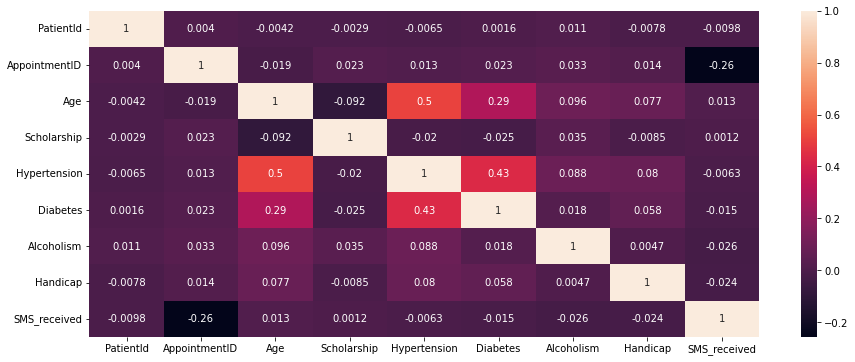

In [36]:
plt.figure(figsize=(15,6))
sns.heatmap(hospital_data_new.corr(), annot = True)
plt.show()

In [34]:
hospital_data_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [85]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
hospital_data_new['Gender']= label_encoder.fit_transform(hospital_data_new['Gender'])
hospital_data_new['No_show']= label_encoder.fit_transform(hospital_data_new['No_show'])

In [86]:
hospital_data_new['No_show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 110522, dtype: int32

In [87]:
hospital_data_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [88]:
x = hospital_data_new[['Gender', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']]

In [89]:
y = hospital_data_new.No_show


In [90]:
x.shape

(110522, 7)

In [91]:
y.shape

(110522,)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [96]:
print("Training Accuracy :", classifier.score(x_train, y_train))
print("Testing Accuracy :", classifier.score(x_test, y_test))

Training Accuracy : 0.7983645678998382
Testing Accuracy : 0.7969690115358516


In [1]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
classifier_dt= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [99]:
print("Training Accuracy :", classifier_dt.score(x_train, y_train))
print("Testing Accuracy :", classifier_dt.score(x_test, y_test))

Training Accuracy : 0.7986020787857538
Testing Accuracy : 0.7970594888034381
